# Functional Data Analysis with Monovariate Prediction
This notebook demonstrates the process of conducting a functional data analysis with a focus on monovariate prediction. It outlines the goal of the notebook, the dataset being used, and the main steps that will be taken.

## Setting Up the Environment
The following cells set up the environment by loading necessary libraries and defining the path to the simulation file.

In [1]:
# @__DIR__ is the directory of the current file
# We need to go up to the parent directory to find the project root
project_root = dirname(dirname(@__DIR__))


include(joinpath(project_root, "setup", "init_env.jl"))
set_R_lib_path(project_root)
using Plots


  Activating project at `c:\Users\User\Documents\repos\TESI\tesi_data\progetto_s_on_f.md\b_spline\functional-data-regression-mip`


## Load Data and Run R Simulation
Here we load the data required for the simulation and run the R simulation script to prepare the data for analysis.

**NOTICE** -> The seed should be the same for both the training and the test datasets, otherwise the data distribution will be different. 
This is very important specifically in the "Paper simulation" where the predictors shape depends on the coefficients a1,...f3 extracted from Uniform and Normal distributions.  

In [2]:
include(joinpath(project_root, "src", "Julia", "utils", "simulation.jl"))


simulation_name = "paper"
simulation_settings_file = "default"

measurements = 300
basis_functions = 6
params_train = (
    observations = 300,
    measurements = measurements,
    basis_functions = basis_functions,
    noise_snr = [100,100],
    seed = 1
)

params_test = (
    observations = 300,
    measurements = measurements,
    basis_functions = basis_functions,
    noise_snr = [100,100],
    seed = 300
)

# Note: Use ... to unpack NamedTuple into keyword arguments
output = load_simulation_data(simulation_name, simulation_settings_file, project_root; params_train...)

output_test = load_simulation_data(simulation_name, simulation_settings_file, project_root; params_test...)


# Grab the outputs from the R script

predictors = Int(output[:predictors])
true_predictors = output[:true_predictors]
intercept = output[:intercept]
observations = Int(output[:observations])

# betas and basis
beta_matrix  = output[:B]
basis_objs   = output[:basis_objs]
basis_values = output[:basis_values]
time_domains = output[:time_domains]

# matrixes 
U = output[:U]
X = output[:X]
Y = output[:Y]
Z = output[:Z]
J = output[:J]
W = output[:W]


X_test = output_test[:X]
Y_test = output_test[:Y]
Z_test = output_test[:Z]
J_test = output_test[:J]
W_test = output_test[:W]



[1] "predictors: 6"
[1] "observations: 300"
[1] "measurements: 300"
[1] "basis_functions: 6"
[1] "intercept: 0"


base64 binary data: G1szM20bWzFt4pSMIBtbMjJtG1szOW0bWzMzbRtbMW1XYXJuaW5nOiAbWzIybRtbMzltUkNhbGwuamw6IENhcmljYW1lbnRvIGRlbCBwYWNjaGV0dG8gcmljaGllc3RvOiBzcGxpbmVzChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IGZkcwobWzMzbRtbMW3ilIIgG1syMm0bWzM5bUNhcmljYW1lbnRvIGRlbCBwYWNjaGV0dG8gcmljaGllc3RvOiByYWluYm93ChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IHBjYVBQChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IFJDdXJsChtbMzNtG1sxbeKUgiAbWzIybRtbMzltQ2FyaWNhbWVudG8gZGVsIHBhY2NoZXR0byByaWNoaWVzdG86IGRlU29sdmUKG1szM20bWzFt4pSCIBtbMjJtG1szOW0KG1szM20bWzFt4pSCIBtbMjJtG1szOW1DYXJpY2FtZW50byBwYWNjaGV0dG86ICdmZGEnChtbMzNtG1sxbeKUgiAbWzIybRtbMzltChtbMzNtG1sxbeKUgiAbWzIybRtbMzltSWwgc2VndWVudGUgb2dnZXR0byDoIG1hc2NoZXJhdG8gZGEgJ3BhY2thZ2U6Z3JhcGhpY3MnOgobWzMzbRtbMW3ilIIgG1syMm0bWzM5bQobWzMzbRtbMW3ilIIgG1syMm0bWzM5bSAgICBtYXRwbG90ChtbMzNtG1sxbeKUgiAbWzIybRtbMzltChtbMzNtG1sxbeKUgiAbWzIybRtbMzltaGVyZSgpIHN0YXJ0

[1] "predictors: 6"
[1] "observations: 300"
[1] "measurements: 300"
[1] "basis_functions: 6"
[1] "intercept: 0"


300×6×6 Array{Float64, 3}:
[:, :, 1] =
 11.4105    1.22407     7.05361  -0.029075    -3.87662  6.16367
  7.3888    1.35211     6.387     0.0458962   -3.29911  2.99205
  4.12952   0.864689    3.1165   -0.016268    -3.1123   6.86866
  7.43053   1.63406     6.73084  -0.0578405   -4.64643  5.66132
  5.52719   0.537636    8.06827  -0.00980486  -5.05395  4.1743
  5.13121  -1.8273      6.41655  -0.0187813   -3.73151  5.64929
  4.89846  -0.707373    9.63973   0.0322879   -4.14693  6.53523
  7.63887  -0.304545   10.2721   -0.00694185  -6.41162  6.41882
  5.9141   -1.54142     5.99366   0.0492938   -4.76384  1.33563
  6.12903   1.83852     7.58923  -0.0471794   -4.02115  4.78276
  7.35822   1.75474     5.78377   0.0473546   -4.07975  6.57472
 10.3925    2.37517     4.87815  -0.0578889   -3.61973  5.52884
  6.4989    1.32601     5.65839  -0.0550969   -5.06854  2.90072
  ⋮                                                     ⋮
  8.35562   0.854606    7.60909   0.0284792   -4.57686  7.94507
  4.7189

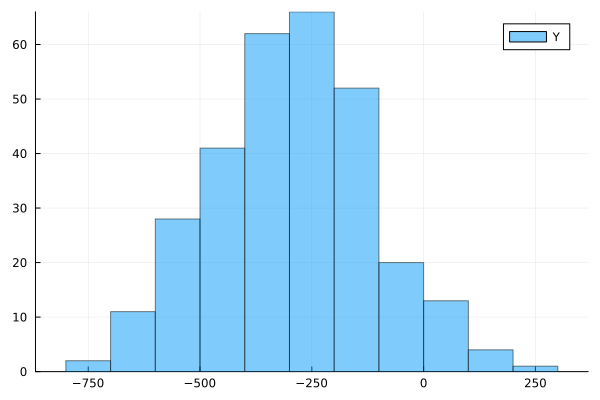

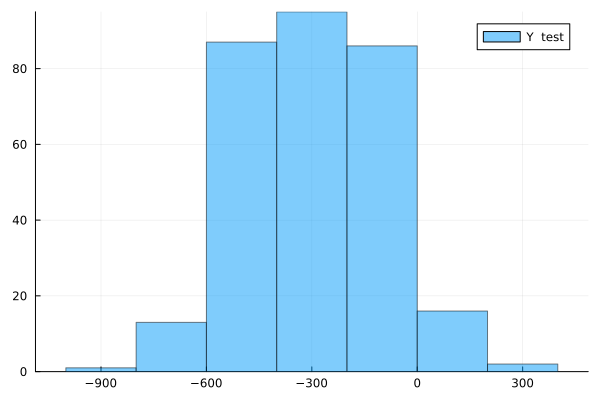

In [3]:
using Plots
h1= histogram(Y, bins=10, alpha=0.5, label="Y ")
display(h1)
h2= histogram(Y_test, bins=10, alpha=0.5, label="Y  test")
display(h2)

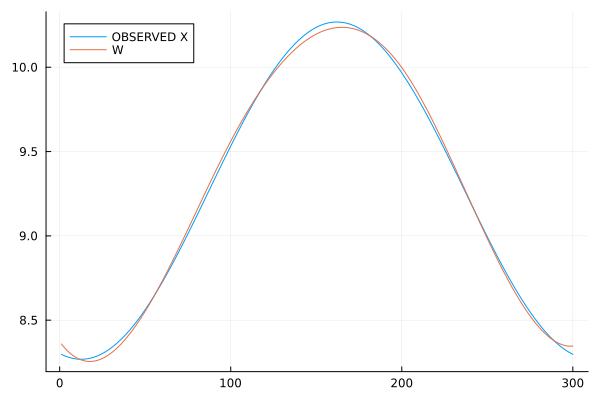

In [4]:
#  plot(U[1,1,:], label="TRUE U", legend=:topleft)
i = 6
p = 1
plot(X[i,p,:], label="OBSERVED X", legend=:topleft)
plot!(basis_values[p,:,:] * W[i, p, :], label="W", legend=:topleft)


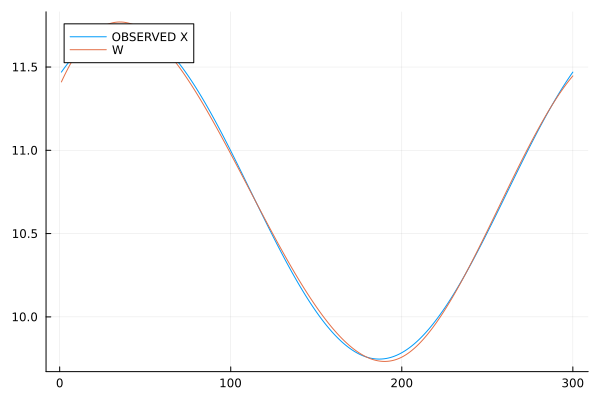

In [5]:
#  plot(U[1,1,:], label="TRUE U", legend=:topleft)
plot(X_test[1,1,:], label="OBSERVED X", legend=:topleft)
plot!(basis_values[1,:,:] * W_test[1, 1, :], label="W", legend=:topleft)


### Training Data Statistics

In [6]:
println("Real \t",Y[i])
# Get the number of predictors
num_predictors = size(W, 2)

# Initialize an empty array to store the results
results = []
i = 12
# Loop over each predictor
for j in 1:num_predictors
  # Perform the operation and store the result
  result = transpose(W[i,j,:]) * J[j,:,:] * beta_matrix[j,:] #Z[i, j, :]' * beta_matrix[j,:]
  push!(results, result)
end

# Print the results
println("Approximated \t",sum(results))

Real 	-270.0408711615871
Approximated 	-306.6538453346496


In [7]:
EER = sum(Y[i]-sum(Z[i, j, :]' * beta_matrix[j,:] for j in 1:num_predictors) for i in 1:observations)
# NOW COMPUTE rmse_predictions
rmse = sqrt(sum((Y[i]-sum(Z[i, j, :]' * beta_matrix[j,:] for j in 1:num_predictors))^2 for i in 1:observations)/observations)
EER, rmse 
#  (-2.3588186494659005, 0.045628452180059516)
#   -2.6107235285160333, 0.04561947150934014

# (8.380748239267355, 0.00041903790906202366)

(-6229.834489334868, 115.34049202337505)

In [ ]:
# EER = sum(Y[i]-sum(Z[i, j, :]' * beta_matrix[j,:] for j in 1:num_predictors) for i in 1:observations)
# # NOW COMPUTE rmse_predictions
# rmse = sqrt(sum((Y[i]-sum(Z[i, j, :]' * beta_star[j,:] for j in 1:num_predictors))^2 for i in 1:observations)/observations)
# EER, rmse 
# #  (-2.3588186494659005, 0.045628452180059516)
# #   -2.6107235285160333, 0.04561947150934014

# # (8.380748239267355, 0.00041903790906202366)

### Let's plot the data

The `plot_predictor_observations` function is used to plot the functional data for a specified predictor across multiple observations. It starts by plotting the first observation and then iteratively adds the remaining observations to the same plot. This function is useful for visualizing how a predictor behaves across different samples.
The `plot_transformed_W` function plots the matrix `W` after transforming it with the corresponding basis values. This is done for a specific predictor across multiple observations. The transformation involves a matrix multiplication of the basis values with the `W` matrix for each observation, which is then plotted. This visualization helps in understanding the effect of the basis transformation on the weights `W`.
Finally, the `plot_Z_observations` function plots the observations from the `Z` matrix for a given predictor. This is similar to the first function but applies to the `Z` matrix, which often contains the true or observed values before any transformation or modeling is applied.



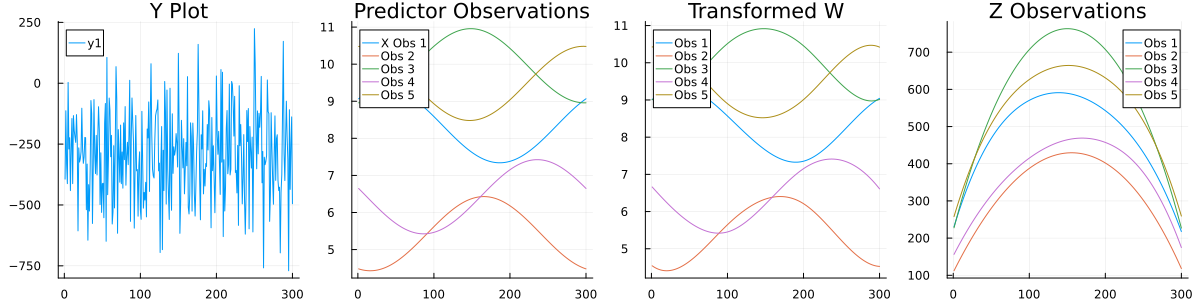

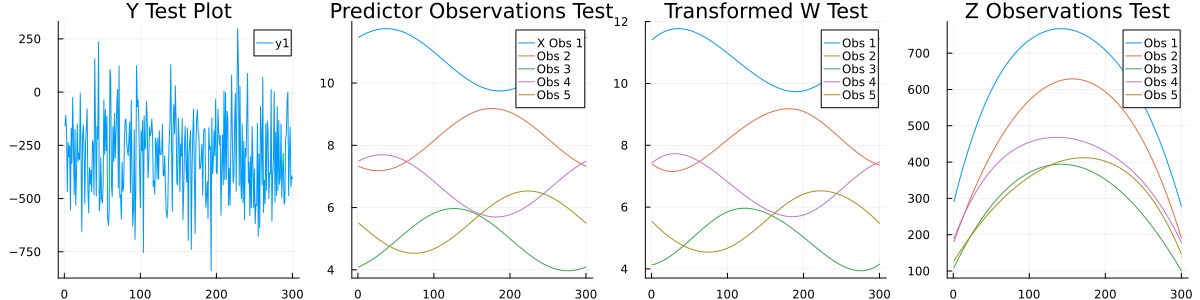

In [8]:
# Function to plot multiple observations for a single predictor
function plot_predictor_observations(X, predictor, obs, plot_title)
    p = plot(X[1, predictor, :], label = "X Obs 1", title = plot_title)  # Start with the first observation
    for i in 2:obs
        plot!(p, X[i, predictor, :], label = "Obs $i")  # Add the rest
    end
    return p
end

# Function to plot the W matrix transformed by the basis values
function plot_transformed_W(basis_values, W, predictor, obs, plot_title)
    p = plot(basis_values[predictor,:,:] * W[1, predictor, :], label = "Obs 1", title = plot_title)  # Start with the first observation
    for i in 2:obs
        plot!(p, basis_values[predictor,:,:] * W[i, predictor, :], label = "Obs $i")  # Add the rest
    end
    return p
end

# Function to plot Z for multiple observations
function plot_Z_observations(Z, predictor, obs, plot_title)
    p = plot( basis_values[predictor,:,:] * Z[1, predictor, :], label = "Obs 1", title = plot_title)  # Start with the first observation
    for i in 2:obs
        plot!(p, basis_values[predictor,:,:] * Z[i, predictor, :], label = "Obs $i")  # Add the rest
    end
    return p
end

# Initialize the plot for predictors
predictor = 1
obs = 5  # Limiting to the first 20 observations for clarity

# Plot Y and Y_test
pY = plot(Y, title = "Y Plot")
pY_test = plot(Y_test, title = "Y Test Plot")

# Plot the predictor, transformed W, and Z for both non-test and test data
p1 = plot_predictor_observations(X, predictor, obs, "Predictor Observations")
p2 = plot_transformed_W(basis_values, W, predictor, obs, "Transformed W")
p3 = plot_Z_observations(Z, predictor, obs, "Z Observations")

p11 = plot_predictor_observations(X_test, predictor, obs, "Predictor Observations Test")
p22 = plot_transformed_W(basis_values, W_test, predictor, obs, "Transformed W Test")
p33 = plot_Z_observations(Z_test, predictor, obs, "Z Observations Test")

# Combining plots side by side
p_non_test = plot(pY, p1, p2, p3, layout = (1, 4), size = (1200, 300))
p_test = plot(pY_test, p11, p22, p33, layout = (1, 4), size = (1200, 300))

# Displaying the combined plots
display(p_non_test)
display(p_test)

## Plotting the Y, Z, W, Basis
Visualize the processed input data to understand its distribution and structure before running the model.

In [ ]:
using RCall

@rput J Z W basis_values
R"""
source(here("src", "R", "generic_simulator", "utils", "plot_utilities.R"))

plot_design_matrix(J[1,,], "J", "basis","basis")
#loop over the rows of Z in R code
for( i in 1:1 ) {
    plot_design_matrix(Z[i, ,], paste("Z-obv",i),"basis", "predictor")
    plot_design_matrix(W[i, ,], paste("W-obv",i),"basis", "predictor")
}
plot_design_matrix(basis_values[1,,], "Basis Values", "basis","times")

"""

## Model Execution
Run the predictive model using the prepared data.

In [11]:
model_name = "l0_limit_MU_ML" 
model_file_path = joinpath(project_root, "src", "Julia","models", model_name *".jl")

include(model_file_path)

# Define the ranges for λ and λ_group
# from integer values of [-5,7]
base = 10
λ_values =   [0]            #  range(-6, stop=1, length=10)
λ_group_values = [0]        #  range(-6, stop=1, length=5)

data = beta_matrix # zeros(size(beta_matrix))
scaling = 0.15
UB_M = data .+ abs.(data) * scaling
LB_M = data .- abs.(data) * scaling
bounds =  maximum(abs.(beta_matrix)) #1.5
UB_M[UB_M .== 0] .= bounds
LB_M[LB_M .== 0] .= -bounds

to_predict = sum(true_predictors)

project_root = dirname(dirname(@__DIR__))
plot_file_path = joinpath(project_root, "src", "Julia","utils", "plot.jl")
include(plot_file_path)
output_folder = joinpath(project_root, "outputs", "plots", simulation_name)

# Loop over the ranges of λ and λ_group
for λ in λ_values
    for λ_group in λ_group_values
        # Print the current values of λ and λ_group
        println("λ =$base ^ $λ, λ_group = $base ^ $λ_group")

        beta_star, alpha_star, groups = mip_functional_regression(Y, Z, base .^ λ, base .^ λ_group, UB_M, LB_M; intercept = output[:intercept] != 0, group_limit= to_predict)
        
        # Plotting
        beta_point_values = output[:beta_point_values]
        plot_combined_predicted_curve(beta_point_values, beta_star, basis_values, time_domains, output_folder, true;  lambda = λ, lambda_group=λ_group)
    end
end


## Model Results
Display the results of the model, including the estimated beta coefficients.

In [ ]:
UB_M

In [ ]:
LB_M

In [ ]:
beta_matrix # true beta

In [ ]:
beta_star  # estimated beta

In [ ]:
groups,true_predictors

In [ ]:
alpha_star

## Final Output
Plot the combined predicted curve and save the output for further analysis.

## Evaluate Model Performance
Evaluate the model's performance using various metrics such as MSE, RMSE, MAE, and relative error.

In [ ]:

using Statistics 
using LinearAlgebra

include(joinpath(project_root, "src", "Julia", "utils", "data_analysis.jl"))

performance_metrics = compute_metrics(Y_test, Z_test, beta_matrix, beta_matrix, alpha_star, groups, predictors)


In [ ]:

using Statistics 
using LinearAlgebra

include(joinpath(project_root, "src", "Julia", "utils", "data_analysis.jl"))

performance_metrics = compute_metrics(Y_test, Z_test, beta_matrix, beta_star, alpha_star, groups, predictors)


## Residual Analysis
Analyze the residuals from the model to check for any patterns that might suggest issues with the model.

In [ ]:
using Plots
include(joinpath(project_root, "src", "Julia", "utils", "data_analysis.jl"))

Y_pred = get_predictions(Z_test, beta_star, alpha_star)
# 1. Scatter plot comparing true vs predicted values
scatter(Y_test, Y_pred, xlabel="True Y", ylabel="Predicted Y", legend=false, title="True vs Predicted Y")
plot!(Y_test, Y_test, color=:red)  # A y=x line for reference
display(plot!())

# 2. Plot residuals
residuals = Y_test - Y_pred
scatter(1:length(Y_test), residuals, xlabel="Observation", ylabel="Residual", legend=false, title="Residuals")
hline!([0], color=:red, label="Zero line")
display(plot!())


In [ ]:
plot(beta_point_values[1,:], label="TRUE BETA", legend=:topleft)


In [ ]:
plot(beta_point_values[2,:], label="TRUE BETA", legend=:topleft)
